In [18]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import numpy as np
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

### Cargar datos y realizar un analisis exploratorio de estos

In [19]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.shape

(1599, 12)

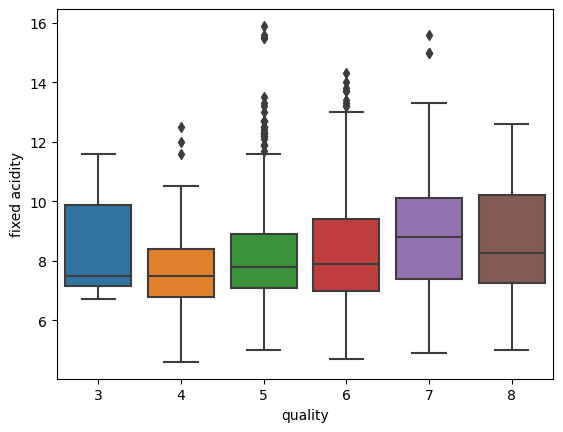

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='quality', y='fixed acidity')
plt.show()

In [21]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
y = df['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [22]:
X.shape

(1599, 11)

In [23]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


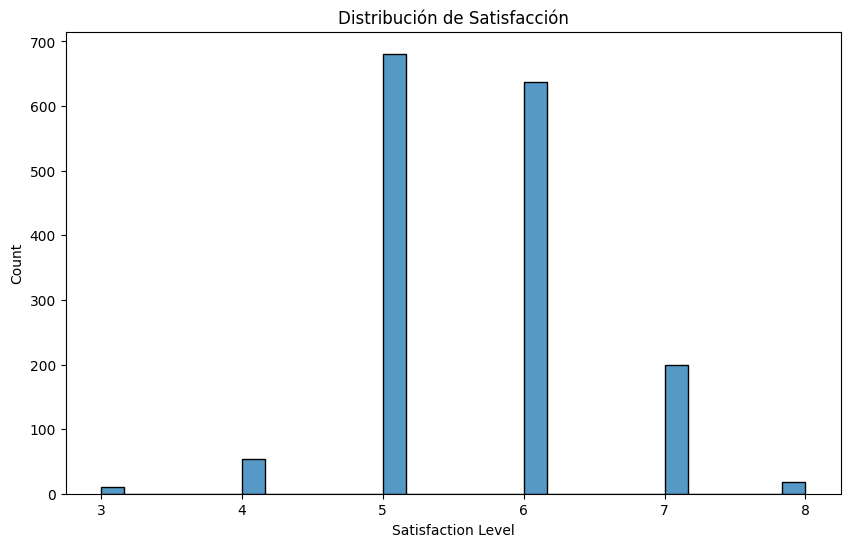

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'])
plt.xlabel('Satisfaction Level')
plt.title('Distribución de Satisfacción')
plt.show()



### Identificación de multicolinealidad

<Axes: >

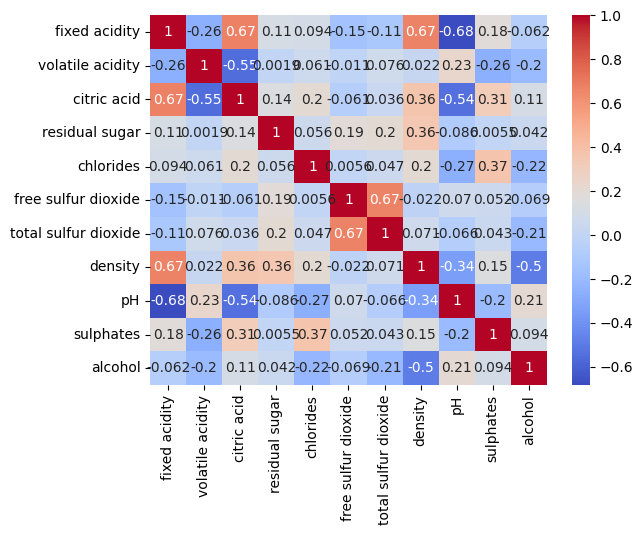

In [25]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

VIF=1 significa que no existe correlación entre esta variable independiente y cualquier otra. 1< VIF < 5 sugiere una correlación moderada pero no sería necesario resolverla. VIF > 5 son niveles críticos de multicolinealidad.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                Variable          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866


In [27]:
#Estamdarozar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print(vif)


                Variable       VIF
0          fixed acidity  7.767512
1       volatile acidity  1.789390
2            citric acid  3.128022
3         residual sugar  1.702588
4              chlorides  1.481932
5    free sulfur dioxide  1.963019
6   total sulfur dioxide  2.186813
7                density  6.343760
8                     pH  3.329732
9              sulphates  1.429434
10               alcohol  3.031160


### Outliers    

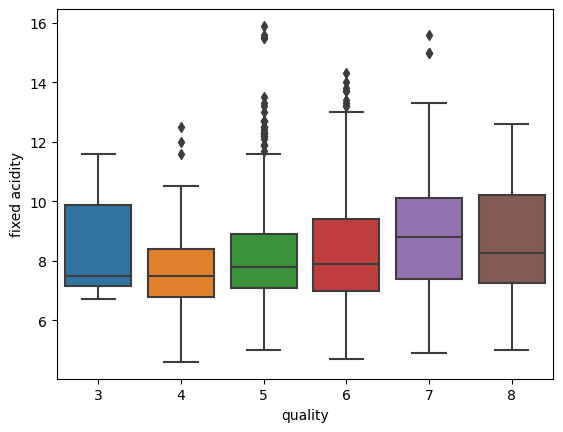

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='quality', y='fixed acidity')
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 0.4112348717504195


La variable Work_accident sera descartada ya que al utilizar el modelo nos dice que se espera que el hecho de tener un accidente laboral hace que aumente la saatisfaccion laboral, lo cual no tiene sentido.

In [31]:
# P-valor   
model = sm.OLS(y_train, X_train)
results = model.fit()
summary = results.summary()

print(summary)

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.6126
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                       0.819
Time:                        14:30:29   Log-Likelihood:                         -3528.1
No. Observations:                1119   AIC:                                      7078.
Df Residuals:                    1108   BIC:                                      7133.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [32]:
alp = np.logspace(-2, 2, 50)

In [33]:
from itertools import combinations


# Lista de todas las combinaciones posibles de quitar hasta 6 variables
combinations_to_try = []
for r in range(1, 6):
    combinations_to_try.extend(combinations(X_scaled.columns, r))

best_model_config_lasso = None
best_model_config_ridge = None
best_model_config_elastic_net = None
best_mse_lasso = float('inf')
best_mse_ridge = float('inf')
best_mse_elastic_net = float('inf')

# Ajustar modelos LassoCV, RidgeCV y ElasticNetCV para cada combinación
for combo in combinations_to_try:
    X_train_subset = X_train.drop(list(combo), axis=1)
    X_test_subset = X_test.drop(list(combo), axis=1)
    
    # Modelo LassoCV
    lasso_model = LassoCV(alphas=np.logspace(-2, 2, 50))
    lasso_model.fit(X_train_subset, y_train)
    y_pred_lasso = lasso_model.predict(X_test_subset)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)

    # Modelo RidgeCV
    ridge_model = RidgeCV(alphas=np.logspace(-2, 2, 50))
    ridge_model.fit(X_train_subset, y_train)
    y_pred_ridge = ridge_model.predict(X_test_subset)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)

    # Modelo ElasticNetCV
    elastic_net_model = ElasticNetCV(alphas=np.logspace(-2, 2, 50), l1_ratio=0.5)
    elastic_net_model.fit(X_train_subset, y_train)
    y_pred_elastic_net = elastic_net_model.predict(X_test_subset)
    mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

    # Actualizar la mejor configuración y MSE para cada modelo
    if mse_lasso < best_mse_lasso:
        best_mse_lasso = mse_lasso
        best_model_config_lasso = combo
    
    if mse_ridge < best_mse_ridge:
        best_mse_ridge = mse_ridge
        best_model_config_ridge = combo
    
    if mse_elastic_net < best_mse_elastic_net:
        best_mse_elastic_net = mse_elastic_net
        best_model_config_elastic_net = combo

print("Mejor configuración de variables (Lasso):", best_model_config_lasso)
print("Mejor MSE (Lasso):", best_mse_lasso)

print("Mejor configuración de variables (Ridge):", best_model_config_ridge)
print("Mejor MSE (Ridge):", best_mse_ridge)

print("Mejor configuración de variables (ElasticNet):", best_model_config_elastic_net)
print("Mejor MSE (ElasticNet):", best_mse_elastic_net)

Mejor configuración de variables (Lasso): ('fixed acidity', 'citric acid')
Mejor MSE (Lasso): 0.4138382880403151
Mejor configuración de variables (Ridge): ('fixed acidity', 'citric acid', 'residual sugar', 'density')
Mejor MSE (Ridge): 0.41115390187372164
Mejor configuración de variables (ElasticNet): ('fixed acidity', 'citric acid', 'residual sugar', 'density')
Mejor MSE (ElasticNet): 0.4121491656197765


In [34]:
#quitar las variables 'fixed acidity', 'citric acid' 
X_train_lasso = X_train.drop(['fixed acidity', 'citric acid'], axis=1)
X_test_lasso = X_test.drop(['fixed acidity', 'citric acid'], axis=1)
X_train_Ridge = X_train.drop(['fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)
X_test_Ridge = X_test.drop(['fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)
X_train_ElasticNet = X_train.drop(['fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)
X_test_ElasticNet = X_test.drop(['fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)

In [35]:
#Ajustar nuevamente el modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 0.4112348717504195


Dado que con los 3 modelos el alpha obtenido es bajo, indica que el modelo tiende a comportarse mas como un regresion lineal estandar y al tener un score bajo significa que el modelo hara buenas predicciones.

Train score R^2: 0.36119824413213164
Test score  R^2: 0.35138853325052444
Coeficientes: [ 0.04085157 -0.196836   -0.04826827  0.01090641 -0.0787435   0.0475832
 -0.1073332  -0.02686639 -0.04927207  0.13773637  0.3110682 ]
Intercepto: 5.6321952753067475


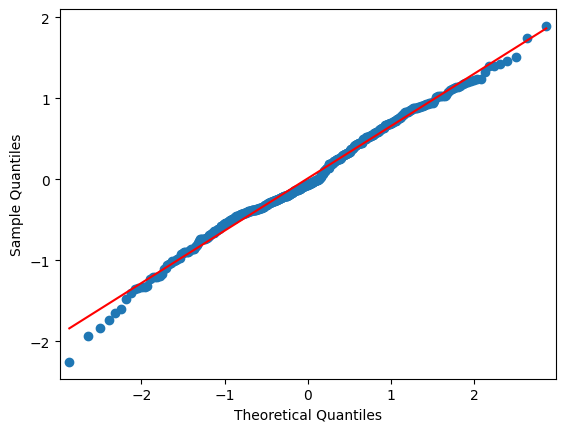

In [57]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('Train score R^2:', train_score)
print('Test score  R^2:', test_score)
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

sm.qqplot(y_test - y_pred, line='r')
plt.show()


Alpha: 39.06939937054613
Score: 0.35151624126872816
Coeficientes: [-0.17653456 -0.08550444  0.04912437 -0.1125735  -0.0491703   0.13034186
  0.30857718]
MSE: 0.41115390187372164


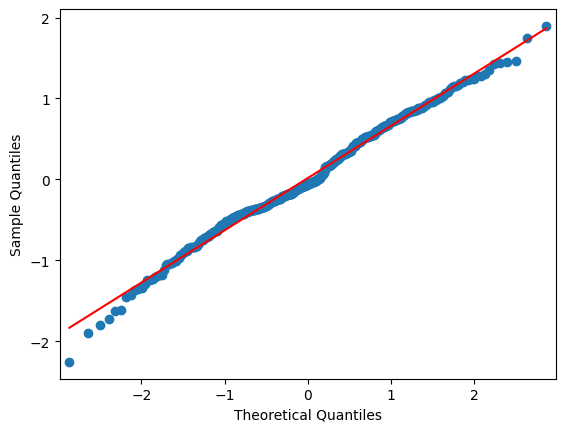

In [56]:
#ridge
ridge_model = RidgeCV(alphas=alp)
ridge_model.fit(X_train_Ridge, y_train)
y_pred_ridge = ridge_model.predict(X_test_Ridge)

print('Alpha:', ridge_model.alpha_)
print('Score:', ridge_model.score(X_test_Ridge, y_test))
print('Coeficientes:', ridge_model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred_ridge))

sm.qqplot(y_test - y_pred_ridge, line='r')
plt.show()

Alpha: 0.01
Score: 0.34728235020441955
Coeficientes: [-0.18031471 -0.         -0.0716039   0.02377554 -0.08787426 -0.
 -0.03573531  0.1215521   0.31315854]
MSE: 0.4138382880403151


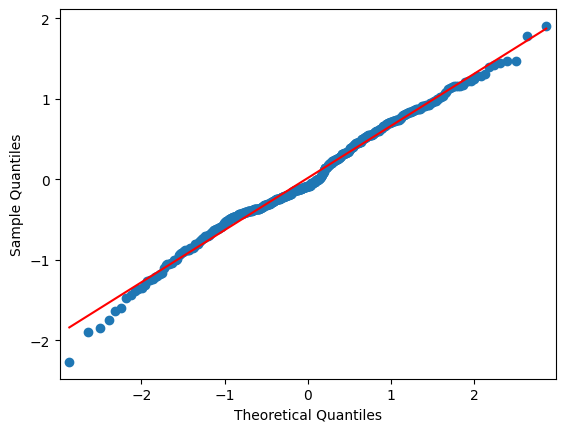

In [58]:
#Lasso
lasso_model = LassoCV(alphas=alp)
lasso_model.fit(X_train_lasso, y_train)
y_pred_lasso = lasso_model.predict(X_test_lasso)

print('Alpha:', lasso_model.alpha_)
print('Score:', lasso_model.score(X_test_lasso, y_test))
print('Coeficientes:', lasso_model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
sm.qqplot(y_test - y_pred_lasso, line='r')
plt.show()


Alpha: 0.01
L1 ratio: 0.5
Score: 0.3499464826648834
Coeficientes: [-0.17889223 -0.07967212  0.03918995 -0.10276491 -0.04406529  0.12707933
  0.31424703]
MSE: 0.4121491656197765


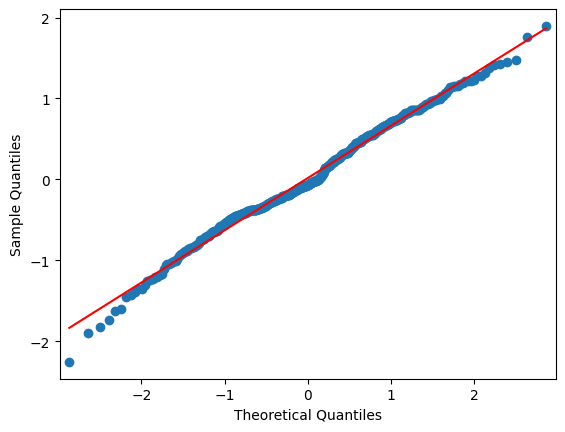

In [59]:
#ElasticNet
elastic_net_model = ElasticNetCV(alphas=alp, l1_ratio=0.5)
elastic_net_model.fit(X_train_ElasticNet, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test_ElasticNet)

print('Alpha:', elastic_net_model.alpha_)
print('L1 ratio:', elastic_net_model.l1_ratio_)
print('Score:', elastic_net_model.score(X_test_ElasticNet, y_test))
print('Coeficientes:', elastic_net_model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred_elastic_net))
sm.qqplot(y_test - y_pred_elastic_net, line='r')
plt.show()

In [40]:
#Ajustar el modelo con PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Modelo de regresion lineal
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

mse = mean_squared_error(y_test_pca, y_pred_pca)
print("Error Cuadrático Medio (MSE):", mse)


Error Cuadrático Medio (MSE): 0.42707095884682134


In [61]:
pca_pipe = make_pipeline(PCA(n_components=6), LinearRegression())
pca_pipe.fit(X_train, y_train)

print(model_pca.score(X_test_pca, y_test_pca))

0.3264114012396879


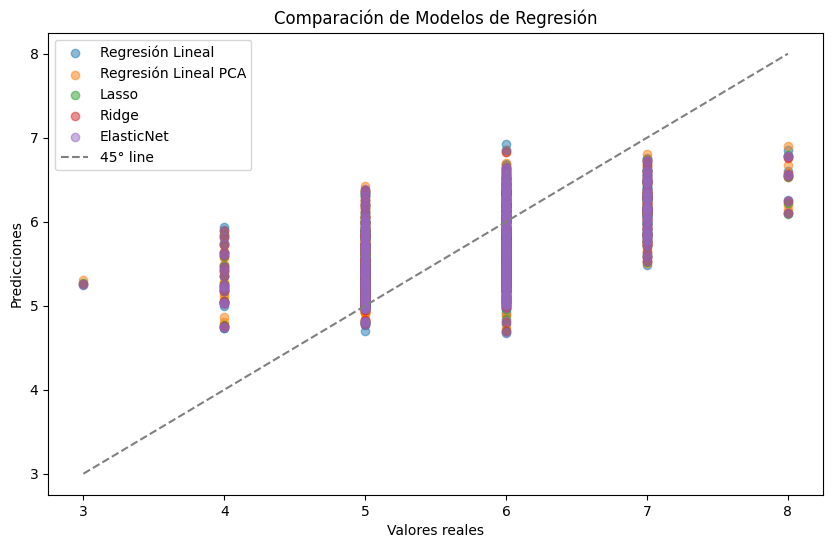

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, label='Regresión Lineal', alpha=0.5)
plt.scatter(y_test_pca, y_pred_pca, label='Regresión Lineal PCA', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.5)
plt.scatter(y_test, y_pred_elastic_net, label='ElasticNet', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='45° line')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Modelos de Regresión')
plt.legend()
plt.show()

In [42]:
y_pred_lasso.shape

(480,)

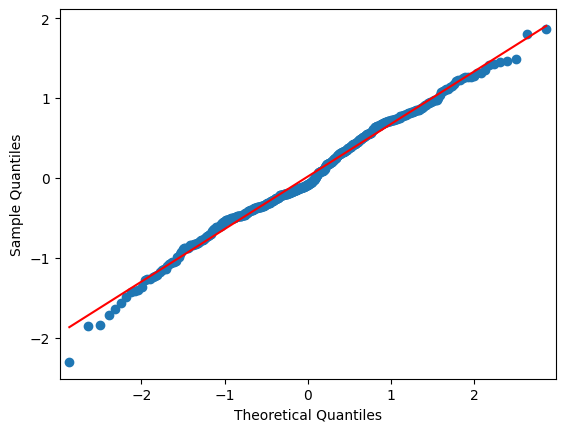

In [54]:
sm.qqplot(y_test - y_pred, line='r')
plt.show()

